In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [57]:
data = pd.read_csv('./data/runtime_data.csv')
data

,Implementation,128,256,512,1024,2048
0,CPU (C),0.001184,0.011997,0.116920,1.017375,33.646096
1,Naive CUDA,0.000248,0.000288,0.000799,0.004872,0.035949
2,Optimized CUDA,0.000226,0.000252,0.000609,0.003151,0.023797
3,cuBLAS,0.008388,0.020142,0.007548,0.008165,0.012450


In [59]:
data.set_index('Implementation', inplace=True)
speedup_df = pd.DataFrame({
    "Naive CUDA Speedup": data.loc['CPU (C)'] / data.loc['Naive CUDA'],
    "Optimized CUDA Speedup": data.loc['CPU (C)'] / data.loc['Optimized CUDA'],
    "cuBLAS Speedup": data.loc['CPU (C)'] / data.loc['cuBLAS']
}).T
data.reset_index(inplace=True)
speedup_df.index.name = 'Implementation'
speedup_df.reset_index(inplace=True)
speedup_df

,Implementation,128,256,512,1024,2048
0,Naive CUDA Speedup,4.774194,41.656250,146.332916,208.820813,935.939692
1,Optimized CUDA Speedup,5.238938,47.607143,191.986864,322.873691,1413.879733
2,cuBLAS Speedup,0.141154,0.595621,15.490196,124.601960,2702.497671


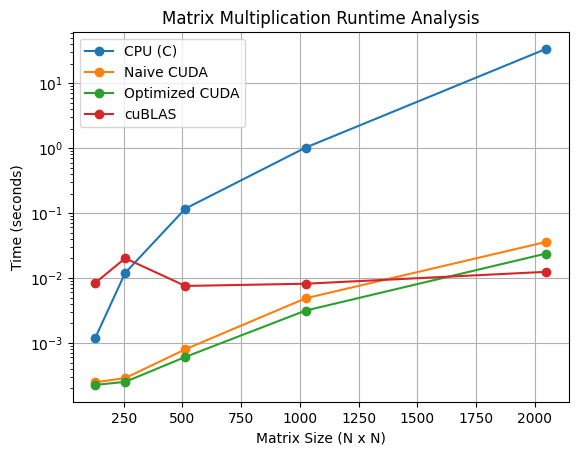

In [60]:
cpu_data = data[data['Implementation'] == 'CPU (C)']
cpu_Ns = np.array(cpu_data.columns[1:]).astype(np.float32)
cpu_times = cpu_data.values[0][1:]

naive_cuda_data = data[data['Implementation'] == 'Naive CUDA']
gpu_Ns = np.array(naive_cuda_data.columns[1:]).astype(np.float32)
gpu_times = naive_cuda_data.values[0][1:]

optimized_cuda_data = data[data['Implementation'] == 'Optimized CUDA']
opt_gpu_Ns = np.array(optimized_cuda_data.columns[1:]).astype(np.float32)
opt_gpu_times = optimized_cuda_data.values[0][1:]

cublas_data = data[data['Implementation'] == 'cuBLAS']
cublas_Ns = np.array(cublas_data.columns[1:]).astype(np.float32)
cublas_times = cublas_data.values[0][1:]

plt.plot(cpu_Ns, cpu_times, marker="o", label="CPU (C)")
plt.plot(gpu_Ns, gpu_times, marker="o", label="Naive CUDA")
plt.plot(opt_gpu_Ns, opt_gpu_times, marker="o", label="Optimized CUDA")
plt.plot(cublas_Ns, cublas_times, marker="o", label="cuBLAS")
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.yscale('log')
plt.title('Matrix Multiplication Runtime Analysis')
plt.grid(True)
plt.legend()
plt.show()